# Exploratory Data Analysis of Wealth Tax in French Communes

## An initial analysis of ISF and IFI across communes in France

### Summary

This notebook aims to explore the distribution of wealth, as represented by the Impôt de solidarité sur la fortune (ISF) and Impôt sur la fortune immobilière (IFI), across different communes in France. We will also attempt some preliminary predictions for the next 5 years.

### Table of Contents

1. [Data Import and Cleaning](#Data-Import-and-Cleaning)
2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
3. [Preliminary Predictions](#Preliminary-Predictions)
4. [Conclusion](#Conclusion)

### Metadata

- Author: [Santiago Patino](https://www.linkedin.com/in/santiago-patino/) - CEO of [Godi.AI](https://www.godi.ai)
- Creation Date: 2023-09-15
- Last Modified: 2023-09-23
- Data Source: [Impôt de solidarité sur la fortune - Impôt sur la fortune immobilière par collectivité territoriale](https://www.data.gouv.fr/fr/datasets/impot-de-solidarite-sur-la-fortune-impot-sur-la-fortune-immobiliere-par-collectivite-territoriale/)


# Basic setting

In [1]:
#Requirements.txt
#pandas
#openpyxl
#xlrd

In [2]:
# Importing required libraries
import pandas as pd 
import os

#Dtypes selecting 

In [3]:
# Define the sample file and path
example_file='\ificom-2022.xlsx'
path=r'G:\Mi unidad\Godi.AI\Operations\Freelancer\Projets\Impots sur la fortune\5YearFrenchWealthAnalysis\DataIn'

# Read a sample of the Excel file, setting all columns initially as string
df_temp = pd.read_excel(path+ example_file, header=0, skiprows=1, nrows=100, dtype=str)

In [4]:
# Inspect the data to decide appropriate data types
df_temp.sample(5)

,Région,Départements,Code commune (INSEE),Commune,nombre de redevables,patrimoine moyen en €,impôt moyen en €
64,ILE-DE-FRANCE,HAUTS-DE-SEINE,92 012,BOULOGNE BILLANCOURT,2118,2313297,9422
22,LES-HAUTS-DE-FRANCE,NORD,59 368,LA MADELEINE,64,2486072,9666
63,NOUVELLE-AQUITAINE,HAUTE-VIENNE,87 085,LIMOGES,149,2314909,10543
76,ILE-DE-FRANCE,PARIS,75 115,PARIS 15e,3602,2291263,9442
41,OCCITANIE,HERAULT,34 057,CASTELNAU LE LEZ,103,2403847,11818


In [5]:
# Define dtype_dict: Data Types for DataFrame Columns
dtype_dict = {
    'Région': str,  # Categorical data
    'Départements': str,  # Categorical data
    'Code commune (INSEE)': str,  # Identifier; non-numeric
    'Commune': str,  # Categorical data
    'nombre de redevables': int,  # Count; integer
    'patrimoine moyen en €': int,  # Monetary; integer
    'impôt moyen en €': int,  # Monetary; integer
    "patrimoine moyen en millions d'euros": float,  # Monetary in millions; float
    "impôt moyen en milliers d'euros": float,  # Monetary in thousands; float
}

# Reading all files 

Scans the specified directory for files with a prefix of 'ificom' and reads them into
a single DataFrame using predefined data types specified in dtype_dict.

In [6]:
# List all files in the folder
all_files = os.listdir(path)

# Filter files that start with 'ificom'
ificom_files = [f for f in all_files if f.startswith('ificom')]

# Initialize an empty DataFrame to hold all the data
df_ificom = pd.DataFrame()

# Read each file and append it to all_data
for file in ificom_files:
    df_temp = pd.read_excel(os.path.join(path, file), header=0, skiprows=1, dtype=dtype_dict)
    
    # Add a new column with the filename
    df_temp['filename'] = file
    
    df_ificom = pd.concat([df_ificom, df_temp], ignore_index=True)

In [7]:
df_ificom.sample(4)

,Région,Départements,Code commune (INSEE),Commune,nombre de redevables,patrimoine moyen en €,impôt moyen en €,filename,Département,Code de la commune (INSEE),Nom de la commune,Nombre de redevables,Patrimoine moyen en €,Impôt moyen en €,patrimoine moyen en millions d'euros,impôt moyen en milliers d'euros
706,ILE-DE-FRANCE,YVELINES,78 146,CHATOU,222.0,NaN,NaN,ificom-2020.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,2.097904,7.571
245,ILE-DE-FRANCE,PARIS,75 114,PARIS 14e,1944.0,2400093.0,10387.0,ificom-2022.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,CENTRE-VAL DE LOIRE,EURE-ET-LOIR,28 085,CHARTRES,96.0,2337133.0,10689.0,ificom-2022.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,NOUVELLE-AQUITAINE,VIENNE,86 194,POITIERS,88.0,NaN,NaN,ificom-2020.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,2.020657,7.501


### INITIAL DATA CLEANING
Before diving into in-depth analysis or visualization, our first task is to
perform an initial round of data cleaning. This is crucial for ensuring that
we can work seamlessly with the data across various datasets that we've 
collated into a single DataFrame, df_ificom.

In [8]:
# Due to inconsistencies in column naming, especially in the 2019 ificom dataset, 
# we need to harmonize the column names by moving data from alternate columns to 
# the primary columns, if the primary columns have NaN values.

# Harmonize 'Départements'
df_ificom.loc[df_ificom['Départements'].isna(), 'Départements'] = df_ificom['Département']

# Harmonize 'Code commune (INSEE)'
df_ificom.loc[df_ificom['Code commune (INSEE)'].isna(), 'Code commune (INSEE)'] = df_ificom['Code de la commune (INSEE)']

# Harmonize 'Commune'
df_ificom.loc[df_ificom['Commune'].isna(), 'Commune'] = df_ificom['Nom de la commune']

# Harmonize 'nombre de redevables'
df_ificom.loc[df_ificom['nombre de redevables'].isna(), 'nombre de redevables'] = df_ificom['Nombre de redevables']

# Harmonize 'patrimoine moyen en €'
df_ificom.loc[df_ificom['patrimoine moyen en €'].isna(), 'patrimoine moyen en €'] = df_ificom['Patrimoine moyen en €']

# Harmonize 'impôt moyen en €'
df_ificom.loc[df_ificom['impôt moyen en €'].isna(), 'impôt moyen en €'] = df_ificom['Impôt moyen en €']

# Drop redundant columns
redundant_columns = ['Département', 'Code de la commune (INSEE)', 'Nom de la commune', 
                     'Nombre de redevables', 'Patrimoine moyen en €', 'Impôt moyen en €']
df_ificom.drop(columns=redundant_columns, axis=1, inplace=True)


In [9]:
# UNIT CONVERSION AND COLUMN CLEANUP
# Updates 'patrimoine moyen en €' and 'impôt moyen en €' based on available alternate units,
# and removes redundant columns.

# Update 'patrimoine moyen en €' based on available values in 'patrimoine moyen en millions d'euros'
mask_for_patrimoine = pd.notna(df_ificom['patrimoine moyen en millions d\'euros'])
df_ificom.loc[mask_for_patrimoine, 'patrimoine moyen en €'] = df_ificom.loc[mask_for_patrimoine, 'patrimoine moyen en millions d\'euros'] * 1_000_000

# Update 'impôt moyen en €' based on available values in 'impôt moyen en milliers d'euros'
mask_for_impot = pd.notna(df_ificom['impôt moyen en milliers d\'euros'])
df_ificom.loc[mask_for_impot, 'impôt moyen en €'] = df_ificom.loc[mask_for_impot, 'impôt moyen en milliers d\'euros'] * 1_000

# Drop the redundant columns
df_ificom.drop(['patrimoine moyen en millions d\'euros', 'impôt moyen en milliers d\'euros'], axis=1, inplace=True)

# YEAR EXTRACTION FROM FILENAME
# Extract the year information from the 'filename' column and convert it to a numeric type.
# Extract the year from the filename and add it as a new column
df_ificom['year'] = df_ificom['filename'].apply(lambda x: x.split('-')[-1].split('.')[0] if '-' in x else x[-8:-5])
df_ificom['year'] = pd.to_numeric(df_ificom['year'], errors='coerce')

# Column Renaming for Enhanced Readability and Standardization
df_ificom.rename(columns={'Région': 'Region', 'Départements': 'Department', 'Code commune (INSEE)': 'Commune_Code_INSEE', 'Commune': 'City',
                          'nombre de redevables': 'Number_of_Taxpayers', 'patrimoine moyen en €': 'Average_Assets_in_Euro',
                          'impôt moyen en €': 'Average_Tax_in_Euro', 'filename': 'Source_File', 'year': 'Year'}, inplace=True)

# BASIC DATA ANALYSIS AND VISUALIZATION & CLEANING
(Pre-Cleaning Inside Data)


#### Record Distribution Across Regions, Departments, and Cities

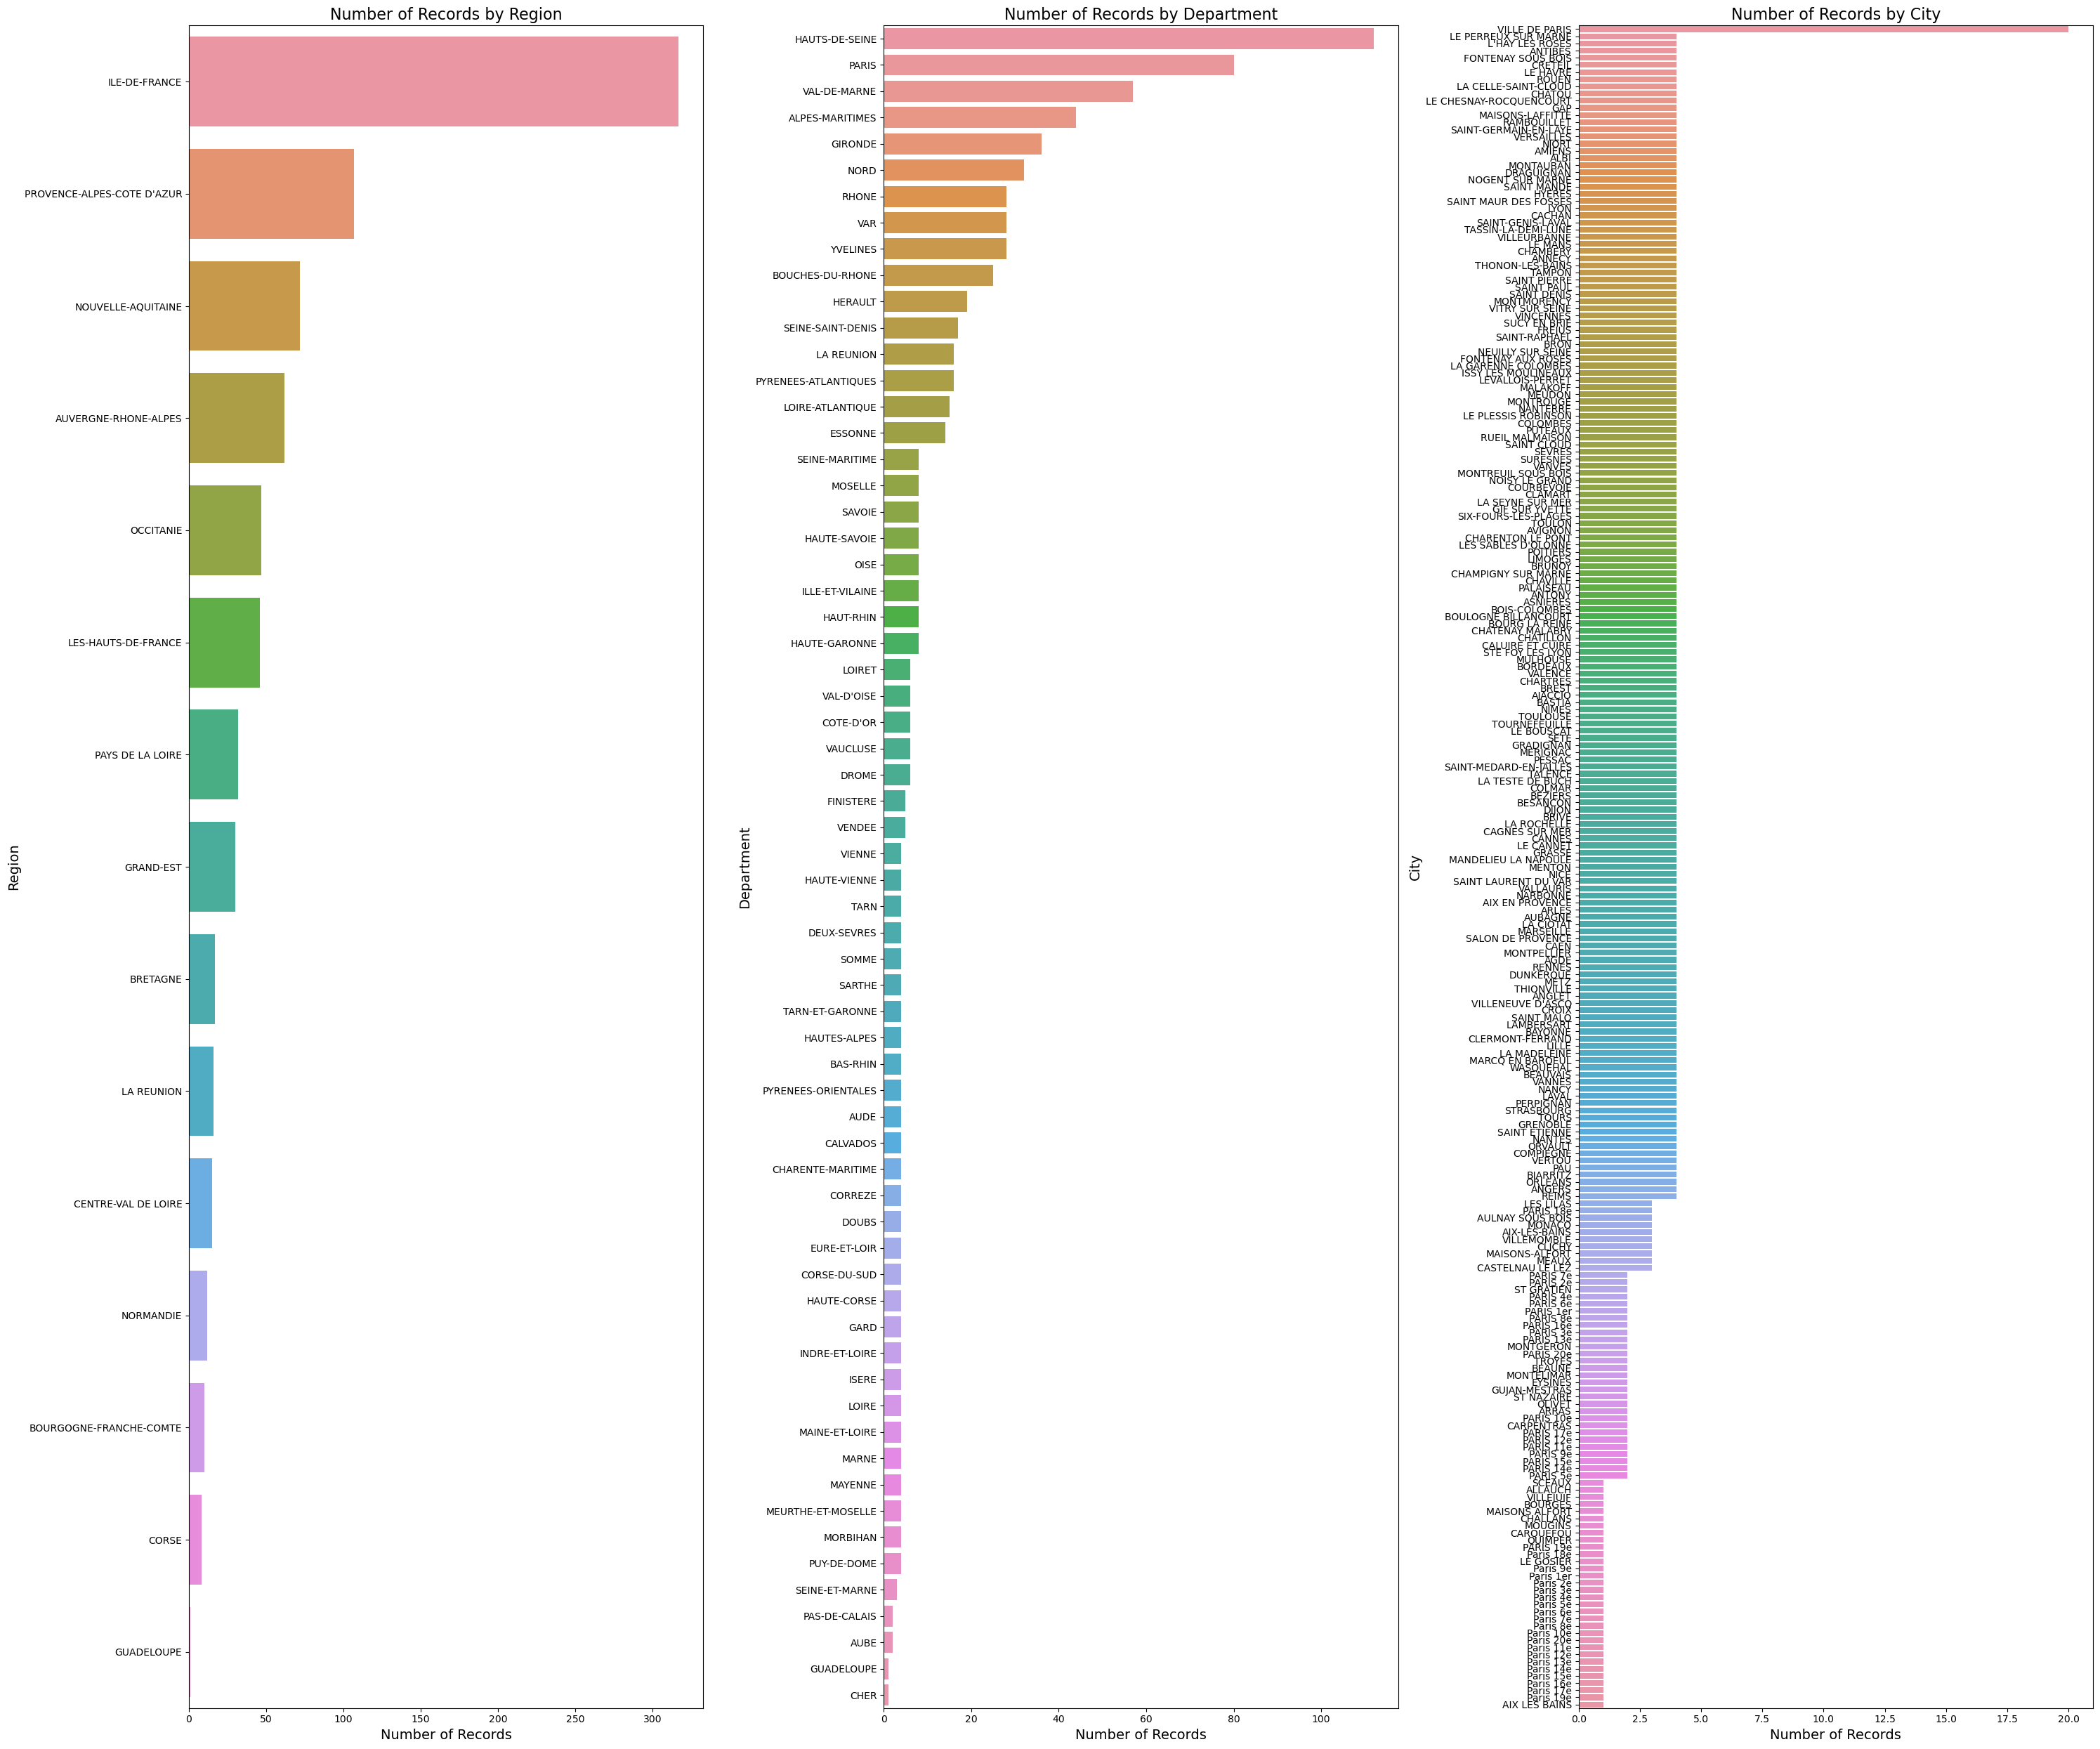

In [12]:
#Visualizing Record Distribution Across Regions, Departments, and Cities
# 
# 
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot category distribution
def plot_category_distribution(ax, df, column):
    sns.countplot(y=column, data=df, ax=ax, order=df[column].value_counts().index)
    ax.set_title(f'Number of Records by {column}', fontsize=16)
    ax.set_xlabel('Number of Records', fontsize=14)
    ax.set_ylabel(column, fontsize=14)

# Initialize figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 25))

# Categories to be plotted
categories = ['Region', 'Department', 'City']

# Generate plots
for ax, category in zip(axes, categories):
    plot_category_distribution(ax, df_ificom, category)

# Adjust layout to avoid overlaps
plt.tight_layout()

# Display the plots
plt.show()

    ##### Analysis ↑: 
    Regarding the 'Regions' and 'Departments', there doesn't appear to be any issue with this visualization. However, concerning the 'Cities', a potential inconsistency is observed. For instance, both 'VILLE DE PARIS' and various arrondissements like 'Paris 15e' are present, which may suggest a data inconsistency. Further investigation is required by checking the INSEE codes for each city to validate this hypothesis.



In [13]:
# Verify potential inconsistencies in INSEE codes for 'VILLE DE PARIS'

# Extract and list INSEE codes for specific city districts
ville_de_paris_codes = df_ificom[df_ificom['City'] == 'VILLE DE PARIS']['Commune_Code_INSEE'].tolist()
paris_18e_codes = df_ificom[df_ificom['City'] == 'Paris 18e']['Commune_Code_INSEE'].tolist()
paris_17e_codes = df_ificom[df_ificom['City'] == 'Paris 17e']['Commune_Code_INSEE'].tolist()

# Output the INSEE codes for verification
print(f"INSEE Codes for 'VILLE DE PARIS': {ville_de_paris_codes}")
print(f"INSEE Codes for 'Paris 18e': {paris_18e_codes}")
print(f"INSEE Codes for 'Paris 17e': {paris_17e_codes}")

INSEE Codes for 'VILLE DE PARIS': [75107, 75108, 75106, 75116, 75104, 75101, 75103, 75118, 75102, 75117, 75105, 75114, 75109, 75115, 75112, 75119, 75113, 75111, 75110, 75120]
INSEE Codes for 'Paris 18e': ['75 118']
INSEE Codes for 'Paris 17e': ['75 117']


    ##### Analysis ↑: 
    This analysis revealed inconsistencies in certain INSEE Codes. For instance, the 17th arrondissement of Paris has varying code formats—sometimes it's '75 117' and other times it's '75117', with or without a space in between. Therefore, data cleaning is required to remove the spaces, followed by standardizing the city name (e.g., either 'VILLE DE PARIS' or 'Paris 17e').

    #### CLEANING Commune_Code_INSEE:

In [14]:
# Remove spaces and convert 'Commune_Code_INSEE' to string
df_ificom['Commune_Code_INSEE'] = df_ificom['Commune_Code_INSEE'].astype(str).str.replace(' ', '', regex=False)

    #### CLEANING city:

In [15]:
# Filter and sort INSEE codes with multiple 'City' names for manual review
grouped = df_ificom.groupby('Commune_Code_INSEE').filter(lambda x: x['City'].nunique() > 1).drop_duplicates(subset=['Commune_Code_INSEE', 'City']).sort_values('Commune_Code_INSEE')

# Log unique codes requiring review
print(f"Unique codes requiring review: {grouped['Commune_Code_INSEE'].nunique()}")

# Add placeholder for final city name and export to Excel
grouped['Final_City'] = ''
grouped.to_excel(r'G:\Mi unidad\Godi.AI\Operations\Freelancer\Projets\Impots sur la fortune\5YearFrenchWealthAnalysis\DataOut\unique_grouped_sorted.xlsx', index=False)


Unique codes requiring review: 22


In [16]:
#Reading cleaned file
unique_grouped_sorted=pd.read_excel(r'G:\Mi unidad\Godi.AI\Operations\Freelancer\Projets\Impots sur la fortune\5YearFrenchWealthAnalysis\DataIn\unique_grouped_sorted.xlsx',dtype=str)
unique_grouped_sorted=unique_grouped_sorted[['Commune_Code_INSEE','Final_City']].drop_duplicates()

#Writing the good city names in the df_ificom

# Assuming that unique_grouped_sorted is your DataFrame that contains the "Final_City"
merged_df = df_ificom.merge(unique_grouped_sorted[['Commune_Code_INSEE', 'Final_City']], on='Commune_Code_INSEE', how='left')

# Update the 'City' column only when 'Final_City' is available
merged_df.loc[~merged_df['Final_City'].isna(), 'City'] = merged_df.loc[~merged_df['Final_City'].isna(), 'Final_City']

# You can now drop the 'Final_City' column if you no longer need it
merged_df.drop(columns=['Final_City'], inplace=True)

# Update your original DataFrame
df_ificom = merged_df
del merged_df

In [17]:
# Load unique INSEE codes and final city names
unique_grouped_sorted = pd.read_excel(r'G:\Mi unidad\Godi.AI\Operations\Freelancer\Projets\Impots sur la fortune\5YearFrenchWealthAnalysis\DataIn\unique_grouped_sorted.xlsx', dtype=str).loc[:, ['Commune_Code_INSEE', 'Final_City']].drop_duplicates()

# Merge and update 'City' in original DataFrame
merged_df = df_ificom.merge(unique_grouped_sorted, on='Commune_Code_INSEE', how='left')
merged_df.loc[~merged_df['Final_City'].isna(), 'City'] = merged_df['Final_City']
df_ificom = merged_df.drop(columns=['Final_City'])


#### Number_of_Taxpayers, Average_Assets_in_Euro, Average_Tax_in_Euro

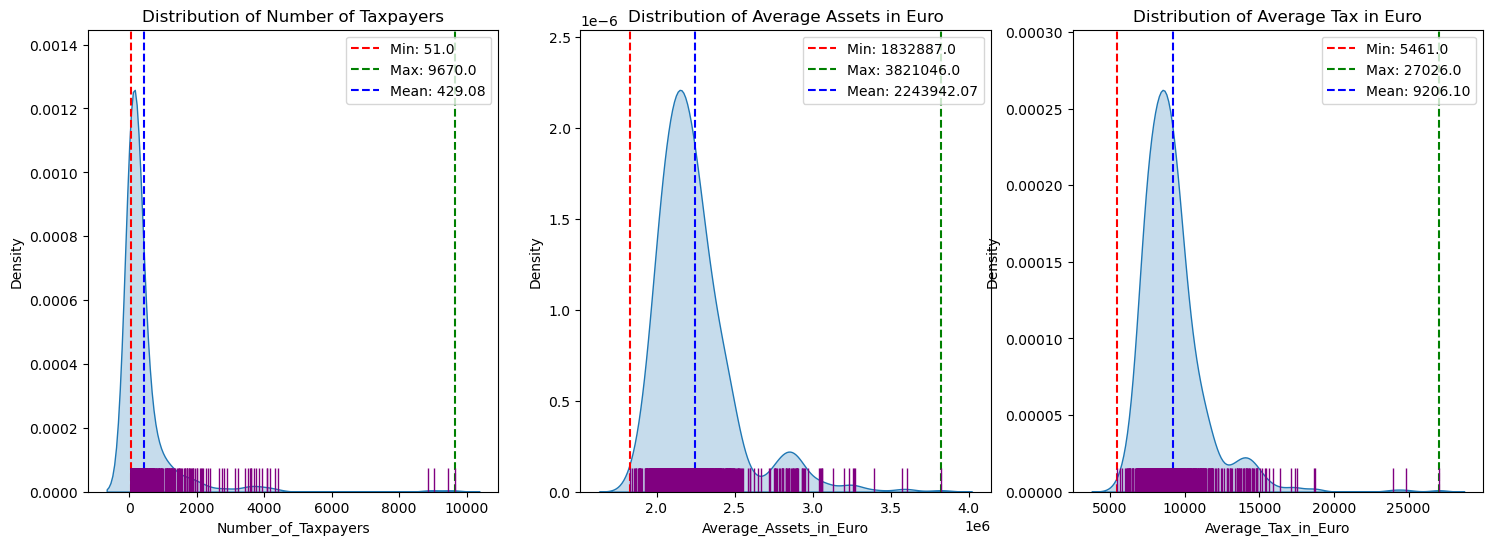

In [18]:
# This plot visualizes the three numerical variables in the dataset: Number_of_Taxpayers, Average_Assets_in_Euro, and Average_Tax_in_Euro. 
# The Kernel Density Estimation (KDE) plot allows us to see the distribution of these variables, along with key summary statistics such as the minimum, maximum, and mean.


# Initialize the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Function to annotate the KDE plot
def annotate_plot(ax, data, title):
    min_val = data.min()
    max_val = data.max()
    mean_val = data.mean()

    # Draw lines to indicate min, mean, and max
    ax.axvline(min_val, color='r', linestyle='--', label=f'Min: {min_val}')
    ax.axvline(max_val, color='g', linestyle='--', label=f'Max: {max_val}')
    ax.axvline(mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')

    # Add rugplot for raw data points
    sns.rugplot(data, height=0.05, ax=ax, color='purple')

    # Customize plot
    ax.set_title(title)
    ax.legend(loc='upper right')

# KDE plot for Number of Taxpayers
sns.kdeplot(df_ificom['Number_of_Taxpayers'], ax=axes[0], fill=True)
annotate_plot(axes[0], df_ificom['Number_of_Taxpayers'], 'Distribution of Number of Taxpayers')

# KDE plot for Average Assets in Euro
sns.kdeplot(df_ificom['Average_Assets_in_Euro'], ax=axes[1], fill=True)
annotate_plot(axes[1], df_ificom['Average_Assets_in_Euro'], 'Distribution of Average Assets in Euro')

# KDE plot for Average Tax in Euro
sns.kdeplot(df_ificom['Average_Tax_in_Euro'], ax=axes[2], fill=True)
annotate_plot(axes[2], df_ificom['Average_Tax_in_Euro'], 'Distribution of Average Tax in Euro')

# Show plot
plt.show()

    ##### Analysis ↑: 
    After examining the plots and basic statistics, we can observe that there are no outliers in terms of both the minimum and maximum values. There are a few data points at the extremes, but they align well with the tails of the normal distribution.
    
    Therefore, no additional data cleaning process is required for these variables.



# EDA: EXPLORATORY DATA ANALYSIS & POWERBI Input & Dash

## KPI: Average tax, assets & taxpayers per region 

In [19]:
# Calculation of Metrics by Region
# It's important to note that the source data already contains average tax and assets per city,
# along with the total number of taxpayers. A traditional average calculation would be misleading,
# as it wouldn't account for the varying number of taxpayers in each city. Thus, cities with many
# taxpayers would carry the same weight as those with few. To address this, the following process
# calculates a weighted average based on the relative number of taxpayers in each city compared to
# the total number of taxpayers in the region.

import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to include only data from the last 5 years
# Adjust the year range according to your dataset
last_5_years_df = df_ificom[df_ificom['Year'].isin(range(2019, 2024))]

# Calculate the total number of taxpayers by region (needed for weighted average)
total_number_tax_payer = last_5_years_df.groupby(by='Region')['Number_of_Taxpayers'].sum()

# Calculate the relative percentage of taxpayers for each city compared to its region
last_5_years_df['Relative_Number_of_Taxpayers'] = last_5_years_df.apply(
    lambda x: x['Number_of_Taxpayers'] / total_number_tax_payer[x['Region']],
    axis=1)

# Calculate relative Average_Assets_in_Euro and relative Average_Tax_in_Euro
last_5_years_df['Relative_Average_Assets_in_Euro'] = last_5_years_df.apply(
    lambda x: x['Average_Assets_in_Euro'] * x['Relative_Number_of_Taxpayers'],
    axis=1)

last_5_years_df['Relative_Average_Tax_in_Euro'] = last_5_years_df.apply(
    lambda x: x['Average_Tax_in_Euro'] * x['Relative_Number_of_Taxpayers'],
    axis=1)

# Sum up the relative averages to get the true average per taxpayer by region
last_5_years_df = last_5_years_df[['Region', 'Relative_Average_Assets_in_Euro', 'Relative_Average_Tax_in_Euro']].groupby(by='Region').sum()\
    .rename(columns={'Relative_Average_Assets_in_Euro': 'Average_Assets_in_Euro_per_taxpayer',
        'Relative_Average_Tax_in_Euro': 'Average_Tax_in_Euro_per_taxpayer'})
    
# Reset the DataFrame index
last_5_years_df = last_5_years_df.reset_index()

# Add total number of taxpayers by region
last_5_years_df['total_tax_payer'] = last_5_years_df.apply(
    lambda x: total_number_tax_payer[x['Region']],
    axis=1)

# Calculate the percentage of tax per taxpayer
last_5_years_df['percent_tax_payer'] = last_5_years_df['Average_Tax_in_Euro_per_taxpayer'] / last_5_years_df['Average_Assets_in_Euro_per_taxpayer']


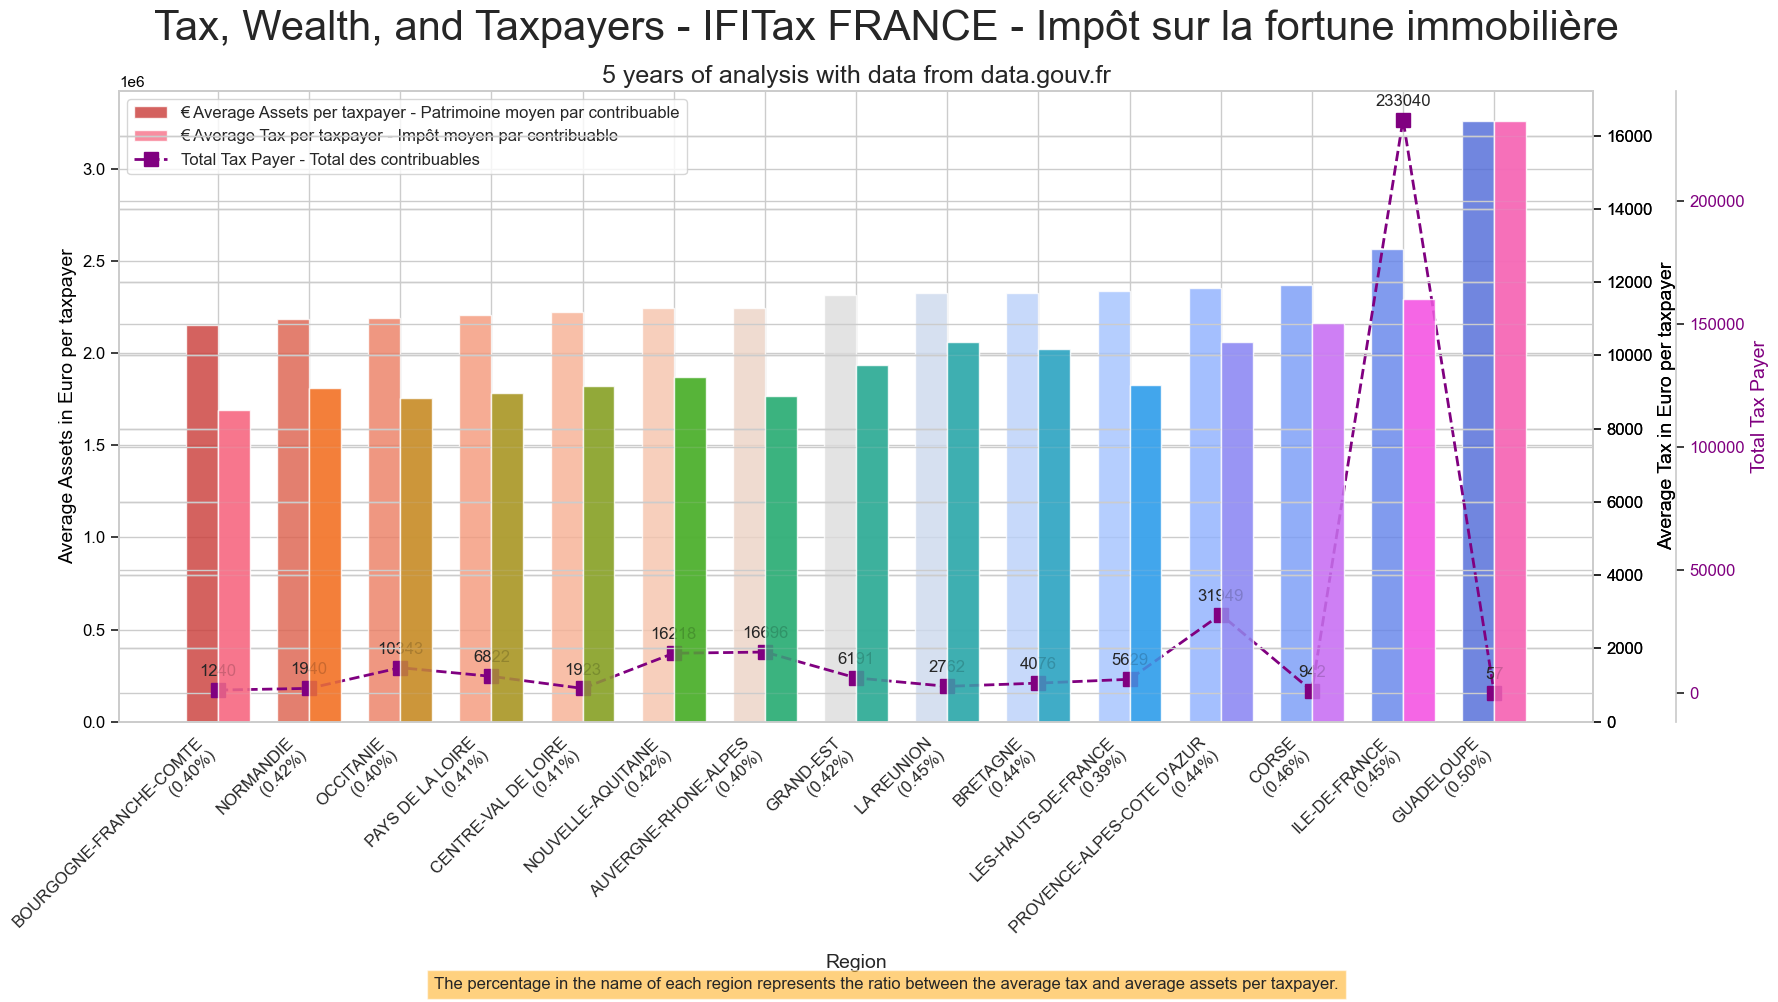

In [21]:
# Comprehensive Visualization of Taxpayer Metrics by Region
# This script generates a bar chart that displays the average assets and taxes per taxpayer across different regions.
# It also overlays the total number of taxpayers in each region as a line chart.
# This analysis is specific to the last 5 years 
# 
# # Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more attractive graph style
sns.set(style="whitegrid")

# Sort the DataFrame by 'Average_Assets_in_Euro_per_taxpayer'
last_5_years_df.sort_values('Average_Assets_in_Euro_per_taxpayer', inplace=True)
last_5_years_df.reset_index(drop=True, inplace=True)
last_5_years_df['Tax_vs_Asset_Ratio'] = (last_5_years_df['Average_Tax_in_Euro_per_taxpayer'] / last_5_years_df['Average_Assets_in_Euro_per_taxpayer']) * 100
# Crea nuevas etiquetas para las regiones que incluyan este porcentaje
new_labels = [f"{region}\n({ratio:.2f}%)" for region, ratio in zip(last_5_years_df['Region'], last_5_years_df['Tax_vs_Asset_Ratio'])]


# Set up the figure
fig, ax1 = plt.subplots(figsize=(18, 10))

# Draw the first data set: Average_Assets_in_Euro_per_taxpayer
width = 0.35
x = np.arange(len(last_5_years_df['Region']))

ax1.bar(x - width/2, last_5_years_df['Average_Assets_in_Euro_per_taxpayer'], width, 
        color=sns.color_palette("coolwarm", 15)[::-1], alpha=0.8, label='€ Average Assets per taxpayer - Patrimoine moyen par contribuable')

# Axis and label configuration for the first data set
ax1.set_xlabel('Region', fontsize=14)
ax1.set_ylabel('Average Assets in Euro per taxpayer', color='black', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black', labelsize=12)

# Create the second axis and draw the second data set: Average_Tax_in_Euro_per_taxpayer
ax2 = ax1.twinx()
ax2.bar(x + width/2, last_5_years_df['Average_Tax_in_Euro_per_taxpayer'], width, 
        color=sns.color_palette("husl", 15), alpha=0.8, label='€ Average Tax per taxpayer - Impôt moyen par contribuable')

# Axis and label configuration fox_labels r the second data set
ax2.set_ylabel('Average Tax in Euro per taxpayer', color='black', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Create third axis for total_tax_payer
ax3 = ax1.twinx()
# Shift the third axis to make it more visible
ax3.spines['right'].set_position(('outward', 60))

# Draw the third data set: total_tax_payer as a more visible line
ln3 = ax3.plot(x, last_5_years_df['total_tax_payer'], color='purple', marker='s', linestyle='--', linewidth=2, markersize=10, label='Total Tax Payer - Total des contribuables')

# Add total_tax_payer value as text annotations
for i, txt in enumerate(last_5_years_df['total_tax_payer']):
    ax3.annotate(f"{txt:.0f}", (x[i], last_5_years_df['total_tax_payer'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Axis and label configuration for the third data set
ax3.set_ylabel('Total Tax Payer', color='purple', fontsize=14)
ax3.tick_params(axis='y', labelcolor='purple', labelsize=12)

# Create the second axis and draw the second data set: Average_Tax_in_Euro_per_taxpayer
ax2 = ax1.twinx()
ax2.bar(x + width/2, last_5_years_df['Average_Tax_in_Euro_per_taxpayer'], width, 
        color=sns.color_palette("husl", 15), alpha=0.8, label='€ Average Tax per taxpayer - Impôt moyen par contribuable')

# Axis and label configuration for the second data set
ax2.set_ylabel('Average Tax in Euro per taxpayer', color='black', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)
'''
# Set the x-axis labels to display the region names
ax1.set_xticks(x)
ax1.set_xticklabels(last_5_years_df['Region'], rotation=45, ha='right', fontsize=12)
'''
# ... (Resto del código para configurar y dibujar el gráfico)

# Configura las etiquetas del eje X para mostrar los nombres de las regiones con el porcentaje
ax1.set_xticks(x)
ax1.set_xticklabels(new_labels, rotation=45, ha='right', fontsize=12)


# Add a single legend for all three datasets
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()

legend = ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left', fontsize=12, frameon=True)
legend.get_frame().set_facecolor('white')


plt.suptitle('Tax, Wealth, and Taxpayers - IFITax FRANCE - Impôt sur la fortune immobilière', fontsize=30)
plt.title('5 years of analysis with data from data.gouv.fr', fontsize=18)

plt.figtext(0.5, 0.001, "The percentage in the name of each region represents the ratio between the average tax and average assets per taxpayer.", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Optimize layout to prevent overlaps
plt.tight_layout()

# Show the figure
plt.show()


    #Analyse:
        Expected a linear correlation between IFI tax and average declared assets, but the data shows otherwise. 
        Expert validation needed.
        Regions with fewer taxpayers like Guadalupe show higher average assets and tax, suggesting concentration of wealth.
        Île-de-France has the majority of taxpayers and confirms to be a hub for wealthier individuals in France.
        A more granular, city-level analysis may offer further insights.


## KPI: Average tax, assets & taxpayers per city 

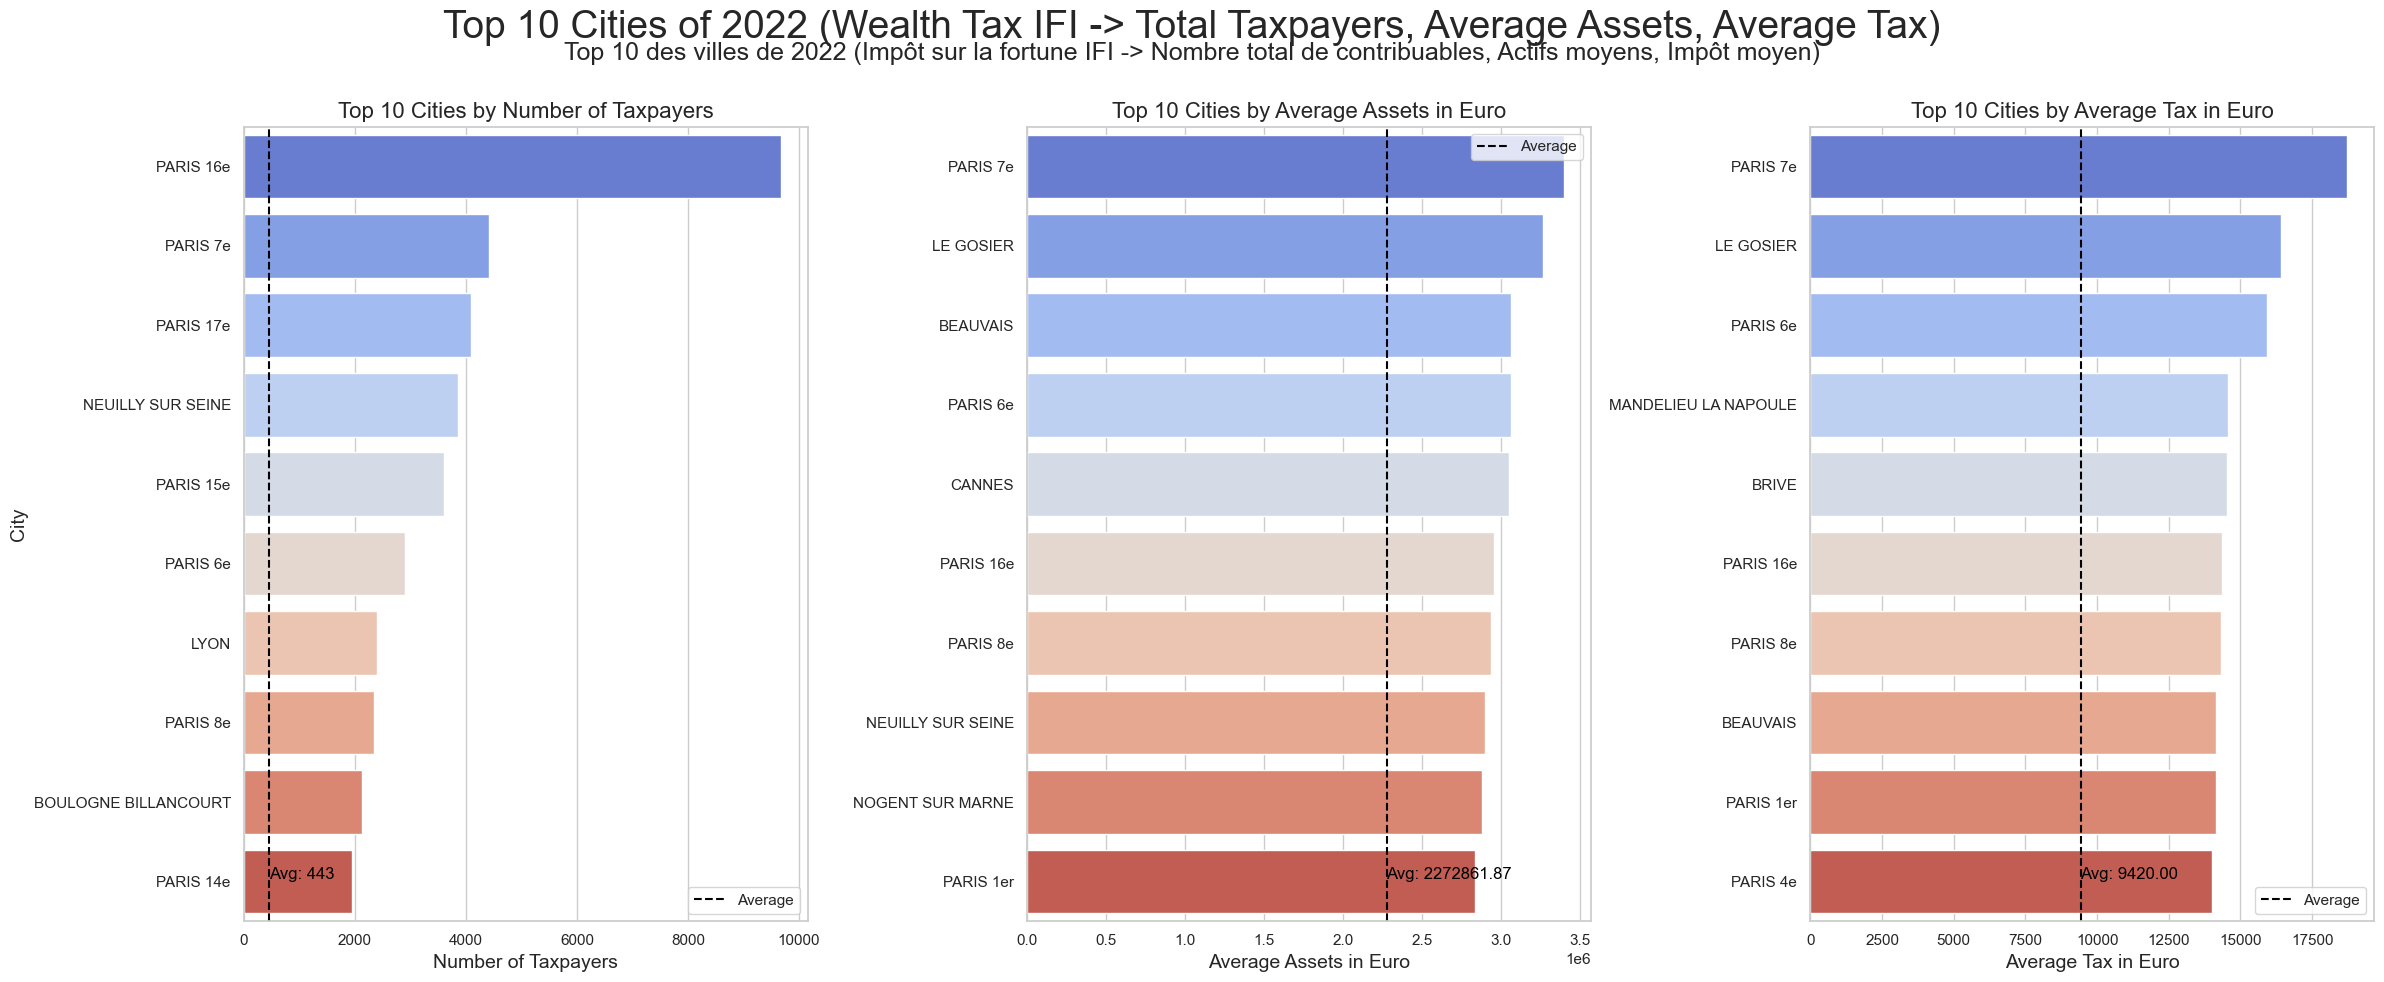

In [22]:
# Visualization of Top 10 Regions by Taxpayer Metrics for the Latest Year
# This script generates horizontal bar charts to visualize the top 10 regions with the highest
# number of taxpayers, average assets in Euro, and average tax in Euro. The data is filtered
# to show only the most recent year available in the dataset.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply Seaborn style
sns.set(style="whitegrid")

# Filter data for the latest year
latest_year = df_ificom['Year'].max()
df_latest_year = df_ificom[df_ificom['Year'] == latest_year]

# Sort and select the top 10 regions of interest
top10_taxpayers = df_latest_year.nlargest(10, 'Number_of_Taxpayers')
top10_assets = df_latest_year.nlargest(10, 'Average_Assets_in_Euro')
top10_tax = df_latest_year.nlargest(10, 'Average_Tax_in_Euro')

# Create a figure and a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 10))

# Add main title and subtitle
fig.suptitle('Top 10 Cities of 2022 (Wealth Tax IFI -> Total Taxpayers, Average Assets, Average Tax)', fontsize=28)
plt.figtext(0.5, 0.93, 'Top 10 des villes de 2022 (Impôt sur la fortune IFI -> Nombre total de contribuables, Actifs moyens, Impôt moyen)', fontsize=18, ha='center')

# General aesthetic settings
palette = sns.color_palette("coolwarm", 10)

# ... [All your previous code stays here]

# Draw bar charts for Top 10 in Number_of_Taxpayers and add average line
sns.barplot(y=top10_taxpayers['City'], x=top10_taxpayers['Number_of_Taxpayers'], ax=axs[0], palette=palette)
avg_taxpayers = df_latest_year['Number_of_Taxpayers'].mean()
axs[0].axvline(avg_taxpayers, color='black', linestyle='--', label='Average')
axs[0].text(avg_taxpayers, 9, f'Avg: {avg_taxpayers:.0f}', color='black', ha='left', va='bottom')
axs[0].set_title('Top 10 Cities by Number of Taxpayers', fontsize=16)
axs[0].set_xlabel('Number of Taxpayers', fontsize=14)
axs[0].set_ylabel('City', fontsize=14)

# Draw bar charts for Top 10 in Average_Assets_in_Euro and add average line
sns.barplot(y=top10_assets['City'], x=top10_assets['Average_Assets_in_Euro'], ax=axs[1], palette=palette)
avg_assets = df_latest_year['Average_Assets_in_Euro'].mean()
axs[1].axvline(avg_assets, color='black', linestyle='--', label='Average')
axs[1].text(avg_assets, 9, f'Avg: {avg_assets:.2f}', color='black', ha='left', va='bottom')
axs[1].set_title('Top 10 Cities by Average Assets in Euro', fontsize=16)
axs[1].set_xlabel('Average Assets in Euro', fontsize=14)
axs[1].set_ylabel('')

# Draw bar charts for Top 10 in Average_Tax_in_Euro and add average line
sns.barplot(y=top10_tax['City'], x=top10_tax['Average_Tax_in_Euro'], ax=axs[2], palette=palette)
avg_tax = df_latest_year['Average_Tax_in_Euro'].mean()
axs[2].axvline(avg_tax, color='black', linestyle='--', label='Average')
axs[2].text(avg_tax, 9, f'Avg: {avg_tax:.2f}', color='black', ha='left', va='bottom')
axs[2].set_title('Top 10 Cities by Average Tax in Euro', fontsize=16)
axs[2].set_xlabel('Average Tax in Euro', fontsize=14)
axs[2].set_ylabel('')

# Add a legend to the plots
for ax in axs:
    ax.legend()

# Adjust layout to make room for the title and subtitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


        ##### Analysis ↑:
        Upon evaluating the Wealth Tax IFI metrics across the top cities for 2022, several insights emerge:

        Differing Rankings: There's a noted discrepancy where top cities by average wealth don't align with those by average tax. This is attributed to the IFI system operating by tranches, taxing only the portion of estate value surpassing certain thresholds. For instance, with an estate of 1,000,000€, tax is applied just to the 200,000€ exceeding the 800,000€ limit.

        Tax Implications: The average tax across France is 0.41% of the average wealth, a result of IFI's non-linear approach. Various factors like specific reductions and exceptions further diversify tax outcomes across cities.

        Paris 16e Concentration: Paris 16e significantly houses wealthy individuals—22 times more than the broader French population. Yet, it secures the fifth spot in both average assets and taxes, underscoring that while Paris 16e has a high wealthy count, Paris 7e is home to the richest.

        In light of the aforementioned insights and considering the tax system's intricacies, these metrics offer a nuanced understanding of wealth and tax distribution across cities.


## KPI: Average grouth per year for tax, assets & taxpayers per city 

In [23]:
import pandas as pd

# Sort the DataFrame by City and Year
df_ificom.sort_values(by=['City', 'Year'], inplace=True)

def calculate_annual_growth_rate(grouped_df):
    """
    Calculate the average annual growth rate for each metric.

    Parameters:
    - grouped_df (DataFrame): Grouped data frame with 'Year' and metric columns.

    Returns:
    - Series: Series containing the average annual growth rate for each metric.
    """
    
    metrics = ['Number_of_Taxpayers', 'Average_Assets_in_Euro', 'Average_Tax_in_Euro']
    growth_rate_dict = {}
    
    for metric in metrics:
        values = grouped_df[metric].dropna()  # Drop NaN values
        rates = [(values.iloc[i] - values.iloc[i-1]) / values.iloc[i-1] * 100 
                 for i in range(1, len(values)) if values.iloc[i-1] != 0]
        
        growth_rate_dict[f'Avg_Annual_Growth_{metric}'] = sum(rates) / len(rates) if rates else None
    
    return pd.Series(growth_rate_dict)

# Calculate average annual growth rates and drop rows with NaN values
avg_growth_df = df_ificom.groupby('City').apply(calculate_annual_growth_rate).dropna().reset_index()

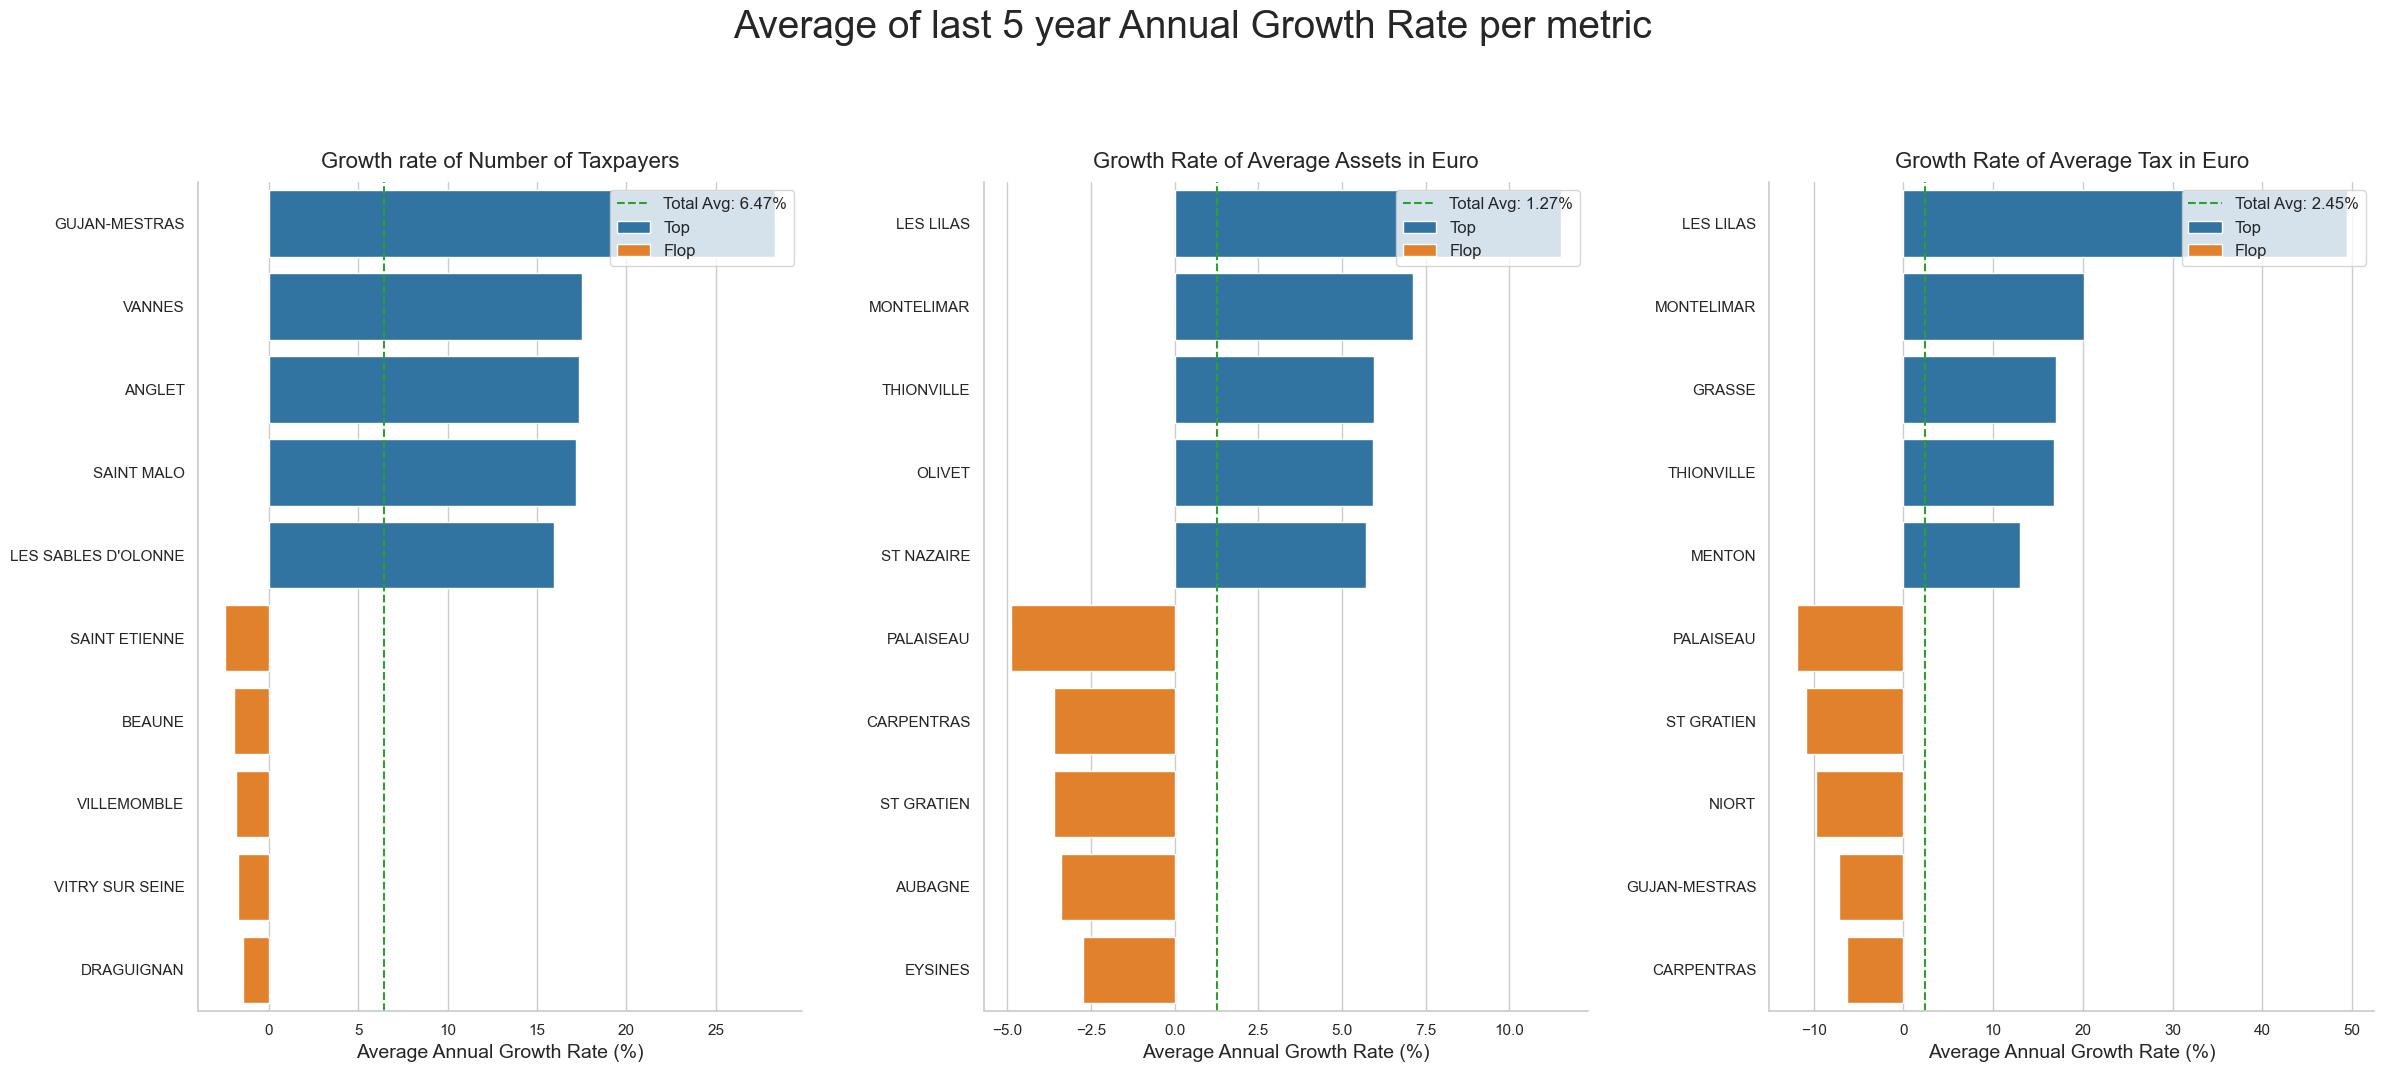

In [24]:
"""
Visualizes the top and bottom five cities based on their average annual growth rates for three metrics:
1. Number of Taxpayers
2. Average Assets in Euro
3. Average Tax in Euro

The visualization presents side-by-side bar charts, distinguishing the top and bottom performers using different colors. 
Each chart also overlays the overall average for its respective metric as a reference.
"""

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define metrics of interest
metrics = ['Avg_Annual_Growth_Number_of_Taxpayers', 'Avg_Annual_Growth_Average_Assets_in_Euro', 'Avg_Annual_Growth_Average_Tax_in_Euro']
top_flop_dfs = []

# Extract top and bottom five cities for each metric
for metric in metrics:
    top5 = avg_growth_df.nlargest(5, metric).copy()
    top5['Type'] = 'Top'
    
    flop5 = avg_growth_df.nsmallest(5, metric).copy()
    flop5['Type'] = 'Flop'
    
    combined = pd.concat([top5, flop5])
    top_flop_dfs.append(combined)

# Set style and palette
sns.set_style("whitegrid")
palette_modern = {'Top': '#1f77b4', 'Flop': '#ff7f0e'}

# Plotting with adjusted main title
fig, axs = plt.subplots(1, 3, figsize=(24, 10))
fig.suptitle('Average of last 5 year Annual Growth Rate per metric', fontsize=28, y=1.07)

for i, (metric, df) in enumerate(zip(metrics, top_flop_dfs)):
    sns.barplot(y='City', x=metric, hue='Type', data=df, ax=axs[i], palette=palette_modern, dodge=False)
    
    # Setting more explicit titles based on metric
    if metric == "Avg_Annual_Growth_Number_of_Taxpayers":
        title_description = "Growth rate of Number of Taxpayers"
    elif metric == "Avg_Annual_Growth_Average_Assets_in_Euro":
        title_description = "Growth Rate of Average Assets in Euro"
    else:
        title_description = "Growth Rate of Average Tax in Euro"
    
    axs[i].set_title(f'{title_description}', fontsize=16, pad=10)  # Adjusted title
    axs[i].set_xlabel('Average Annual Growth Rate (%)', fontsize=14)
    axs[i].set_ylabel('')
    
    # Display total average for each metric
    total_avg = avg_growth_df[metric].mean()
    axs[i].axvline(x=total_avg, color='#2ca02c', linestyle='--', label=f'Total Avg: {total_avg:.2f}%', linewidth=1.5)
    axs[i].legend(fontsize=12, loc='upper right')

    # Hide right and top spines for a cleaner look
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

        #### Analysis ↑: 
        
        This visualization provides insights into the average annual growth rates for three key metrics over the last five years:
        1. Number of Taxpayers
        2. Average Assets in Euro
        3. Average Tax in Euro

        By analyzing the top and bottom five cities based on these metrics, we can discern whether cities have, on average, experienced growth or decline in these areas over the past half-decade.


        #### Key Takeaways:
        
        - The data gives us an intuition about regions where wealth is either accumulating or being distributed. Such insights can be invaluable for sectors like real estate investment, where understanding financial trends can impact investment decisions.

        - An interesting observation is that the number of taxpayers has seen an average increase of 6.46% over the last five years. On the other hand, the average assets have grown by a mere 1.27%. This suggests that while more individuals are entering the taxpayer bracket, the wealth (or assets) is being distributed among a larger population, rather than accumulating with a select few.
        
        - This distribution trend is significant as it can indicate a city's economic policies, investment climate, and overall financial health.

        In conclusion, this visualization serves as a useful tool for stakeholders to understand city-wise economic trends and make informed decisions accordingly.
        """

## Timeseries representation: Average grouth per year for tax, assets & taxpayers per city 

In [25]:
"""
Objective: Plot the time series for the TOP 5 / FLOP 5 cities based on their average annual growth rate.
This code calculates the average annual growth rate for cities with data spanning the entire 5-year period of the graph (to ensure complete lines).

By the end of this code, there will be a DataFrame detailing which cities will be plotted for each metric. It's important to note that the top performers for one metric may not be the same across all metrics.
This code computes the growth rate for all cities.
"""

import pandas as pd

def calculate_annual_growth_rate(grouped_df):
    grouped_df = grouped_df.sort_values('Year')
    metrics = ['Number_of_Taxpayers', 'Average_Assets_in_Euro', 'Average_Tax_in_Euro']
    growth_rate_dict = {}
    
    for metric in metrics:
        growth_rates = []
        for i in range(1, len(grouped_df)):
            previous_value = grouped_df[metric].iloc[i-1]
            current_value = grouped_df[metric].iloc[i]
            
            # Skip years with missing values (NaN)
            if pd.notna(previous_value) and pd.notna(current_value) and previous_value != 0:
                growth_rate = ((current_value - previous_value) / previous_value) * 100
                growth_rates.append(growth_rate)
        
        # Calculate average growth rate if there are valid growth rates
        if growth_rates:
            average_growth_rate = sum(growth_rates) / len(growth_rates)
            growth_rate_dict[f'Avg_Annual_Growth_{metric}'] = average_growth_rate
        else:
            growth_rate_dict[f'Avg_Annual_Growth_{metric}'] = None
    
    return pd.Series(growth_rate_dict)

avg_growth_df = df_ificom.groupby('City').apply(calculate_annual_growth_rate)

# Drop rows with missing data
avg_growth_df=avg_growth_df.dropna()

# Reset the index of the DataFrame
avg_growth_df=avg_growth_df.reset_index()

# Define a function to check if a city has data for all specified years
def has_data_for_years(city, years, df):
    city_years = df[df['City'] == city]['Year'].unique()
    return all(year in city_years for year in years)

# Identify cities that have data for all specified years
years_to_check = [2019, 2020, 2021, 2022]
cities_with_full_data = [city for city in avg_growth_df['City'].unique() if has_data_for_years(city, years_to_check, df_ificom)]

# Assuming avg_growth_df is the DataFrame with average city-wise growth obtained earlier
top_flop_cities_df = pd.DataFrame()

# Loop over each metric to find the top cities
for metric in ['Avg_Annual_Growth_Number_of_Taxpayers', 'Avg_Annual_Growth_Average_Assets_in_Euro', 'Avg_Annual_Growth_Average_Tax_in_Euro']:
    sorted_df = avg_growth_df.sort_values(by=[metric], ascending=False)
    
    # Filter out cities that aren't in cities_with_full_data and get the top 10
    top_cities = [city for city in sorted_df['City'].tolist() if city in cities_with_full_data][:10]
    
    top_flop_cities_df[metric + '_Top'] = top_cities
    
    sorted_df = avg_growth_df.sort_values(by=[metric], ascending=True)  # Sort in ascending order for flop
    flop_cities = [city for city in sorted_df['City'].tolist() if city in cities_with_full_data][:10]
    
    top_flop_cities_df[metric + '_Flop'] = flop_cities
    

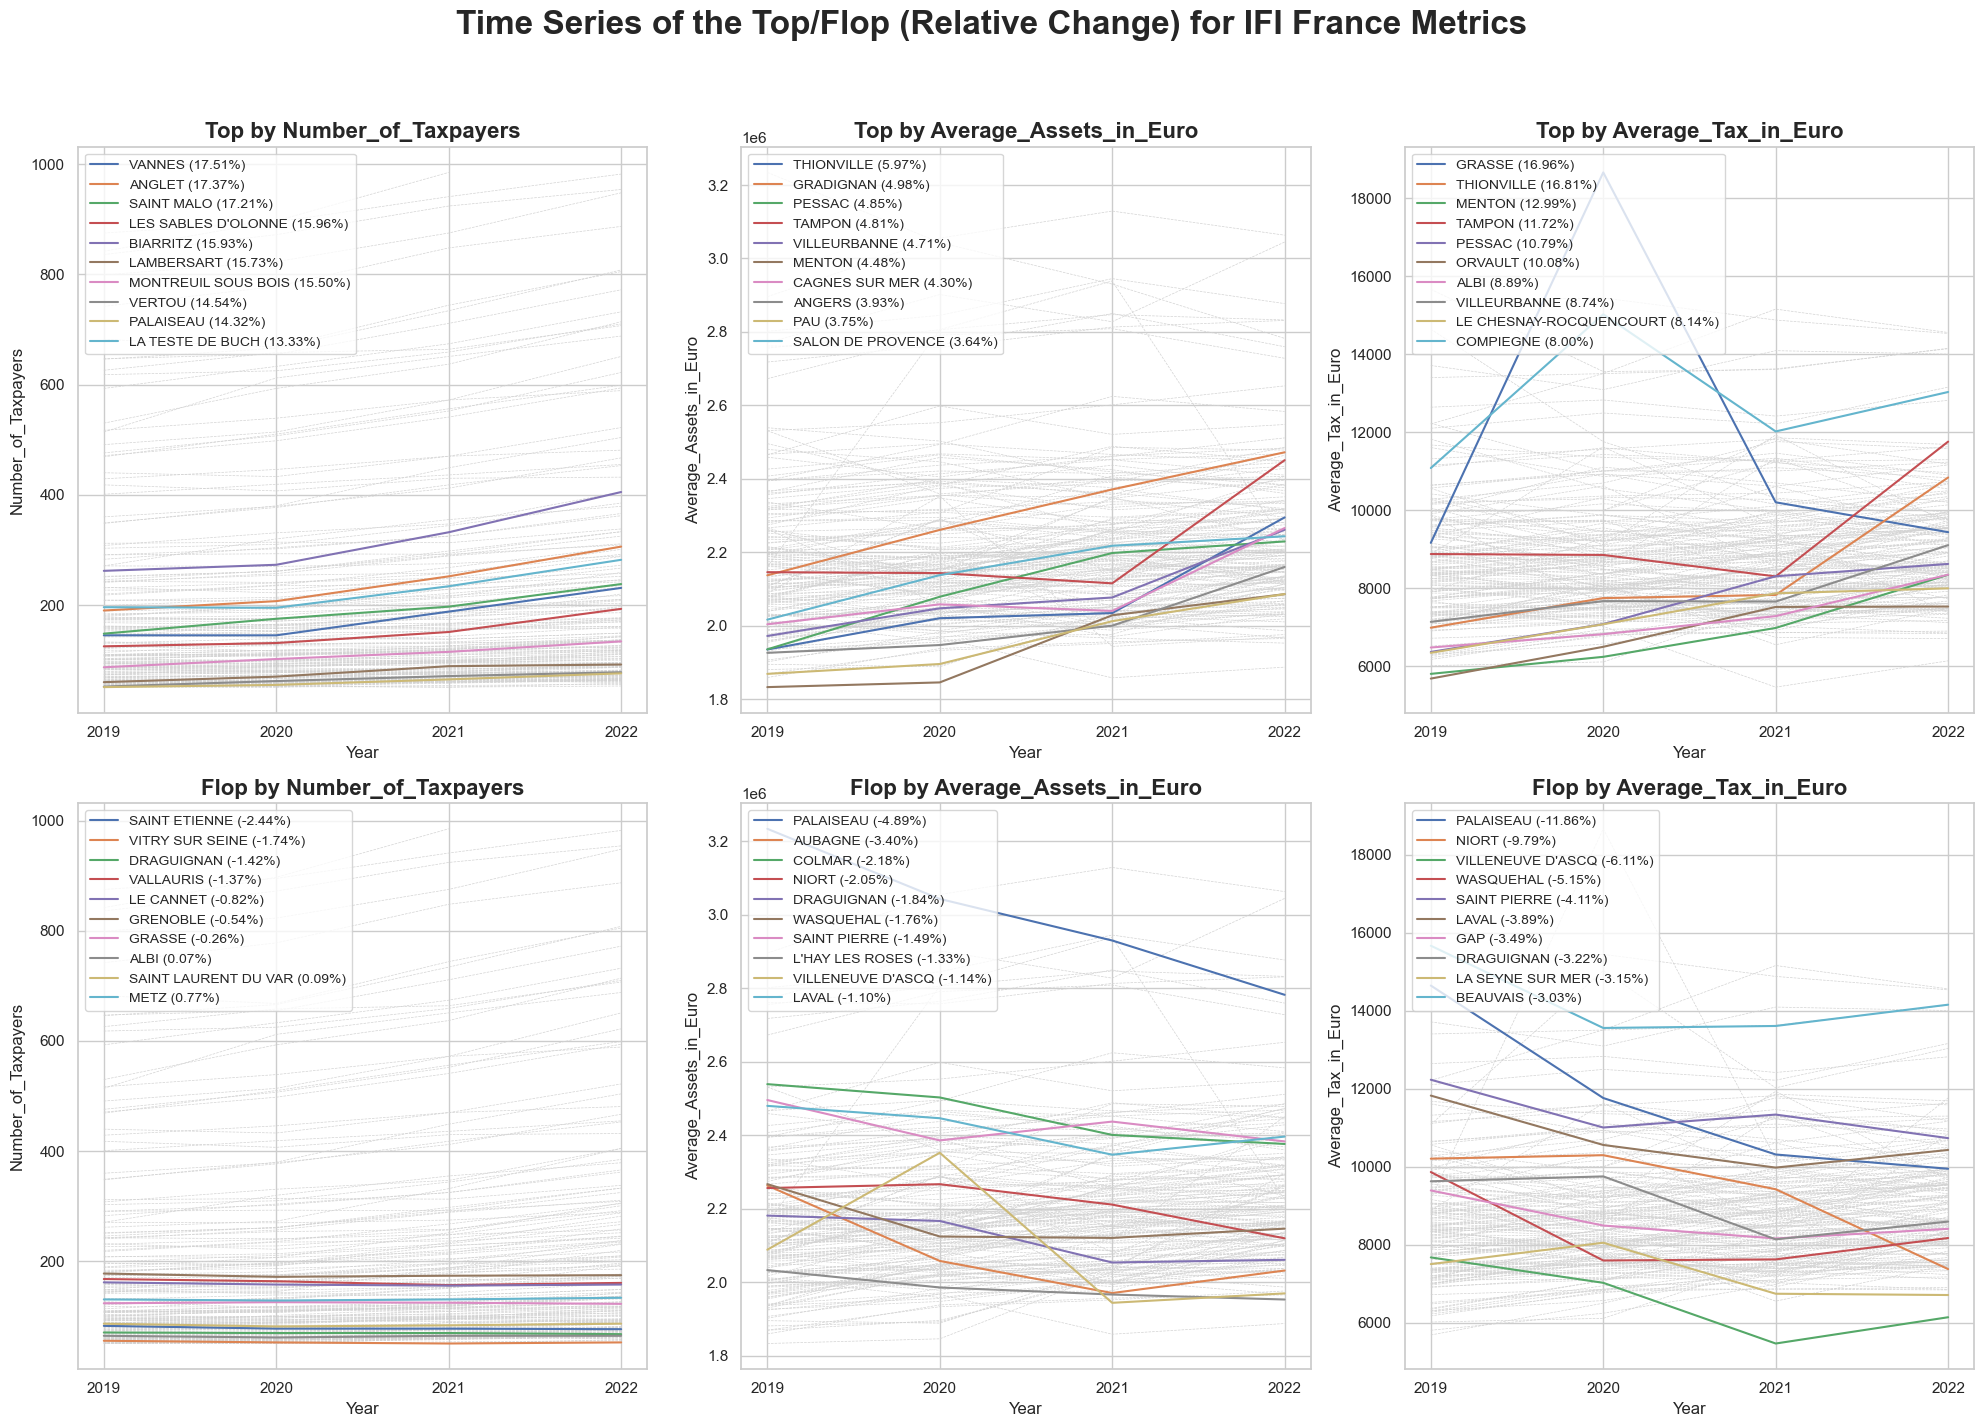

In [70]:
'''
In this code, we visualize the cities that have experienced the most and least growth over the past 5 years.
The time series for each detailed metric is displayed year by year.
The cities and their growth percentages were computed in the preceding code, and this time series visualization relies on data from the main code.
'''

# Set Seaborn style and initialize the figure
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Time Series of the Top/Flop (Relative Change) for IFI France Metrics', fontsize=24, fontweight='bold')
metrics = ['Number_of_Taxpayers', 'Average_Assets_in_Euro', 'Average_Tax_in_Euro']

# Function to plot all cities in grey
def plot_all_cities_in_grey(ax, metric):
    for city in df_ificom['City'].unique():
        if city not in cities_with_full_data:
            continue
        city_data = df_ificom[df_ificom['City'] == city].sort_values('Year')
        sns.lineplot(x='Year', y=metric, data=city_data, ax=ax, color='lightgrey', linestyle='--', linewidth=0.5, label='')

# Loop over each row (Top and Flop)
for i, ranking in enumerate(['Top', 'Flop']):
    for j, metric in enumerate(metrics):
        
        # Ensure years are integers
        all_years = df_ificom['Year'].unique()
        axs[i, j].set_xticks(sorted(all_years))
        
        plot_all_cities_in_grey(axs[i, j], metric)
        cities = top_flop_cities_df[f'Avg_Annual_Growth_{metric}_{ranking}']
        
        for city in cities:
            city_data = df_ificom[df_ificom['City'] == city].sort_values('Year')
            
            # Get the growth rate for the city and format it for the label
            growth_rate = avg_growth_df[avg_growth_df['City'] == city][f'Avg_Annual_Growth_{metric}'].iloc[0]
            label = f"{city} ({growth_rate:.2f}%)"
            
            sns.lineplot(x='Year', y=metric, data=city_data, ax=axs[i, j], label=label)
        
        axs[i, j].set_title(f"{ranking} by {metric}", fontsize=16, fontweight='bold')
        axs[i, j].set_xlabel('Year', fontsize=12)
        axs[i, j].set_ylabel(metric, fontsize=12)
        
        if axs[i, j].get_legend_handles_labels()[0]:
            axs[i, j].legend(loc='upper left', frameon=True, fontsize='small', framealpha=0.8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


    #### Analysis ↑  Number of Taxpayers:
    When examining the number of taxpayers across cities, it's evident that this number isn't standardized across all cities - a phenomenon that's expected. However, a bulk of cities fall within the range of 100 to 200 taxpayers. What stands out is the pronounced relative average changes among the top-ranking cities. Specifically, there are five cities that have seen an average growth in the number of taxpayers ranging between 17% and 13%.

    Additionally, the trend is undeniably positive. This aligns with the insights from the graph in the previous section, where it was observed that the average number of taxpayers grows by more than 6% annually.

    Average Assets Analysis:
    A closer look reveals cities that have witnessed a surge in average assets, and others where there's been a decline. This fluctuation in assets is mirrored in the taxation data. While there are larger relative changes in tax amounts, the pattern of ups and downs remains consistent.


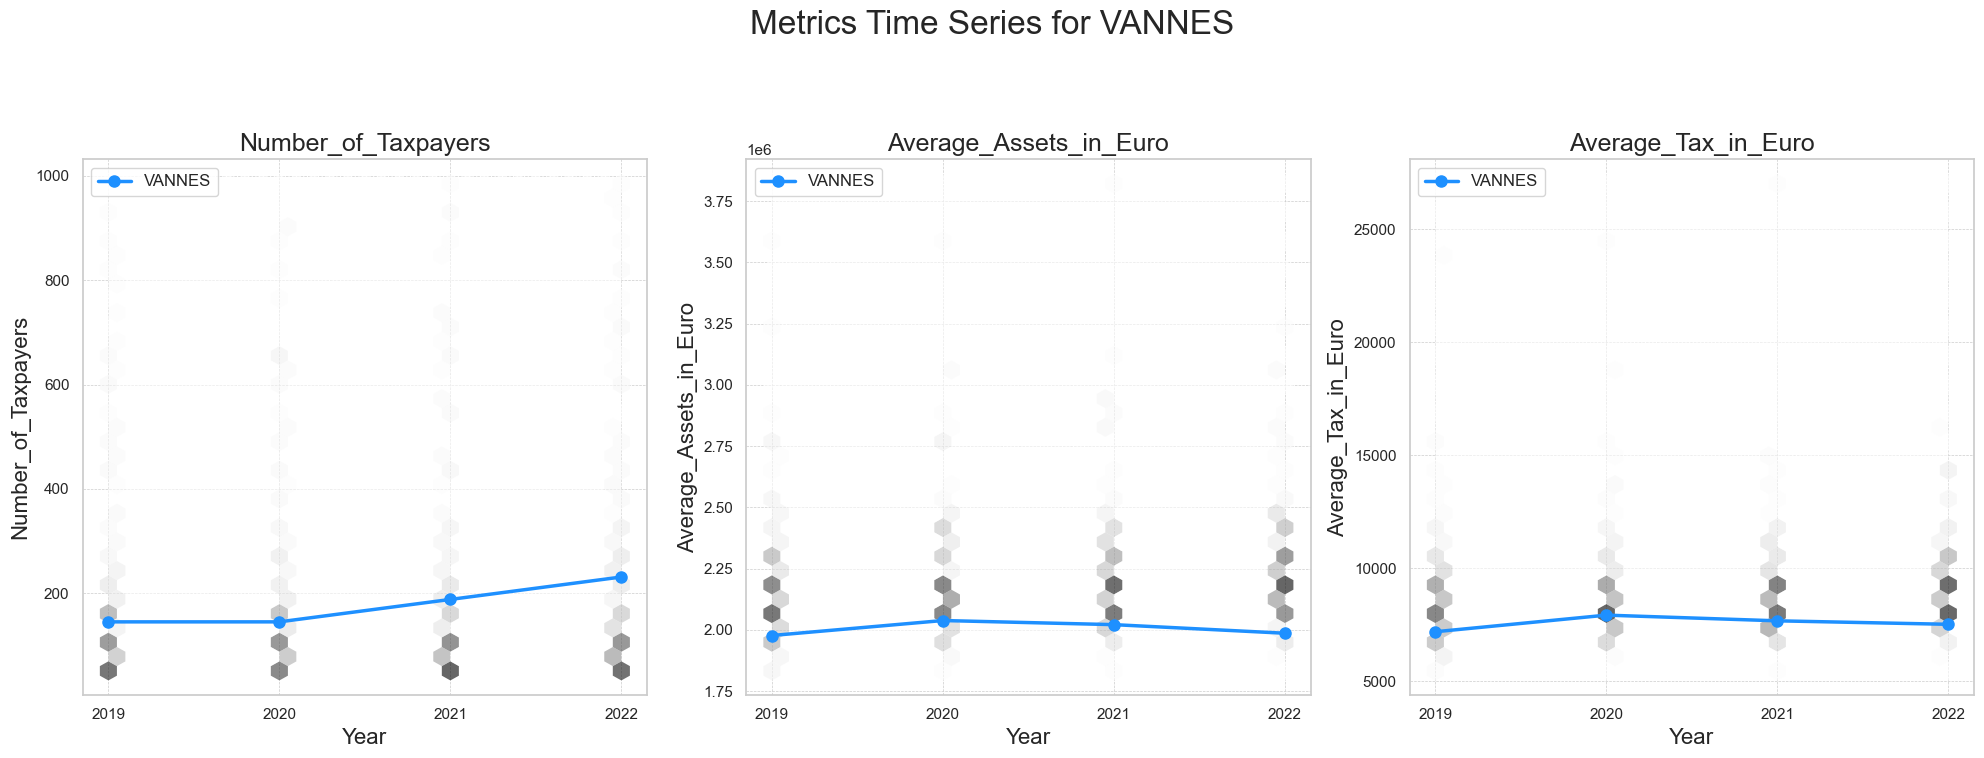

In [27]:
# This code refines the previous graph, focusing on a specific city - in this case, 'VANNES', 
# which is the top city in terms of growth in the number of taxpayers.
# This graph also provides a zoomed view on the 'Number_of_Taxpayers' metric, making it easier 
# to examine due to variations among cities.
# Note: When developing an algorithm using these metrics, it's essential to standardize the data, 
# as the representation for each city may vary.

from matplotlib.ticker import MaxNLocator

# Focus on the city 'VANNES'
selected_city = 'VANNES'
city_data = df_ificom[df_ificom['City'] == selected_city].sort_values('Year')

# Filter for more relevant range of 'Number_of_Taxpayers'
df_ificom = df_ificom[df_ificom['Number_of_Taxpayers'].between(0, 1000)]

# Setup the figure layout
fig, axs = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle(f'Metrics Time Series for {selected_city}', fontsize=24, y=1.08)
metrics = ['Number_of_Taxpayers', 'Average_Assets_in_Euro', 'Average_Tax_in_Euro']

all_years = []
all_values = {metric: [] for metric in metrics}
all_cities = df_ificom['City'].unique()

for city in all_cities:
    if city != selected_city:
        other_city_data = df_ificom[df_ificom['City'] == city].sort_values('Year')
        all_years.extend(other_city_data['Year'].tolist())
        for metric in metrics:
            all_values[metric].extend(other_city_data[metric].tolist())

# Plot the background data and highlight the selected city
for i, metric in enumerate(metrics):
    axs[i].hexbin(all_years, all_values[metric], gridsize=30, cmap='Greys', alpha=0.6, edgecolors='none')
    axs[i].plot(city_data['Year'], city_data[metric], 'o-', label=selected_city, color='dodgerblue', linewidth=2.5, markersize=8)
    axs[i].set_title(metric, fontsize=18)
    axs[i].set_xlabel('Year', fontsize=16)
    axs[i].set_ylabel(metric, fontsize=16)
    axs[i].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[i].legend(loc='upper left', fontsize=12)
    axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))

# Display the plot
plt.tight_layout()
plt.show()

    ####Analysis ↑: In this visualization, we can swiftly gauge the metrics for a given city. Furthermore, with the subtle hexbin background (the small gray circles), it's possible to discern where most other cities fall concerning these metrics. This context enables us to determine if the city we're examining is an outlier or aligns with broader trends.

## Correlation Analyses 

#### Correlation of all variables vs Region

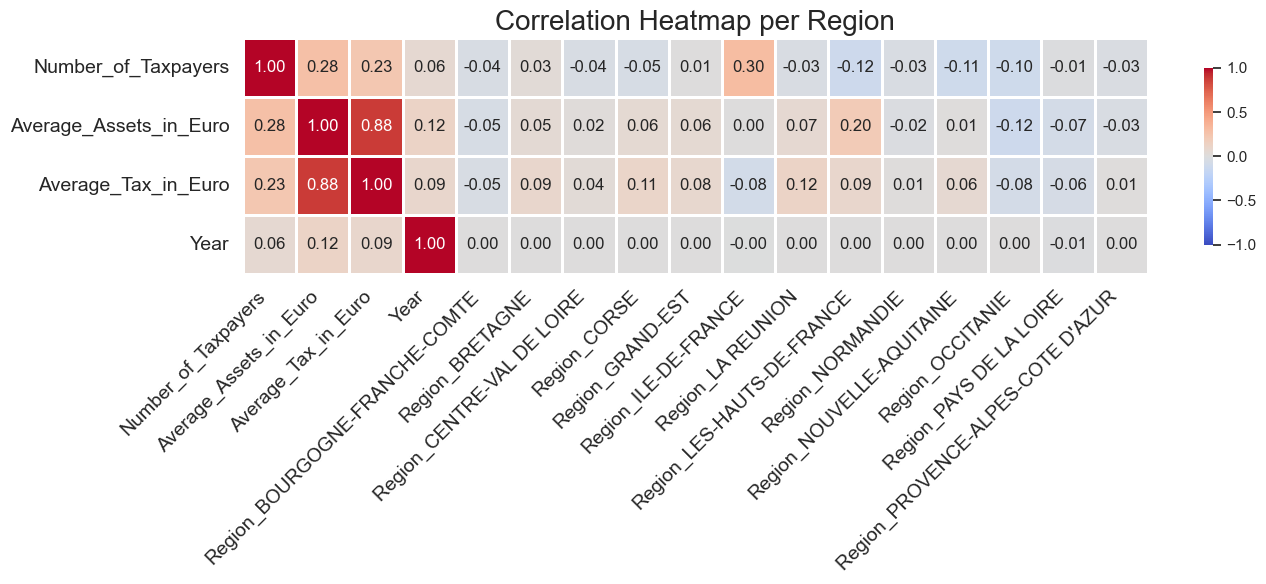

In [59]:
# This heatmap displays the correlation among all previously identified variables, 
# incorporating the notion of region. The goal is to ascertain any correlations 
# between the variables and among different regions.


# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_ificom and cities_with_full_data are already defined
df_dummies = pd.get_dummies(
    df_ificom[['Number_of_Taxpayers', 'Average_Assets_in_Euro', 'Average_Tax_in_Euro', 'Year', 'Region', 'City']]
    .query('City in @cities_with_full_data')
    .drop(columns=['City']),
    columns=['Region'], drop_first=True
)

# Calculate the correlation matrix
df_corr = df_dummies.corr()

# Filter out non-region columns
non_region_cols = ['Number_of_Taxpayers', 'Average_Assets_in_Euro', 'Average_Tax_in_Euro', 'Year']

# Filter the correlation matrix to exclude intra-region correlations
df_corr = df_corr.loc[non_region_cols, :]

# Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1, linecolor='white',
            cbar_kws={"shrink": 0.75}, fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap per Region', fontsize=20)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


    #### Analysis ↑ : We observe a robust correlation between average assets and the corresponding tax paid. This relationship is intuitive, even though they aren't perfectly linearly related.

    Another intriguing insight is the positive relationship between the number of taxpayers and both the average assets and the tax paid. This trend is expected: a higher number of taxpayers typically leads to greater revenue. However, this trend is not universally observed across all cities.

    For instance, in "Les Hauts de France", there's an inverse relationship: as the number of taxpayers decreases, both the average assets and the tax paid increase. This suggests that the departing taxpayers might be the less affluent ones, possibly having lost their wealth. Consequently, those who remain are likely the wealthier segment, contributing more in taxes.



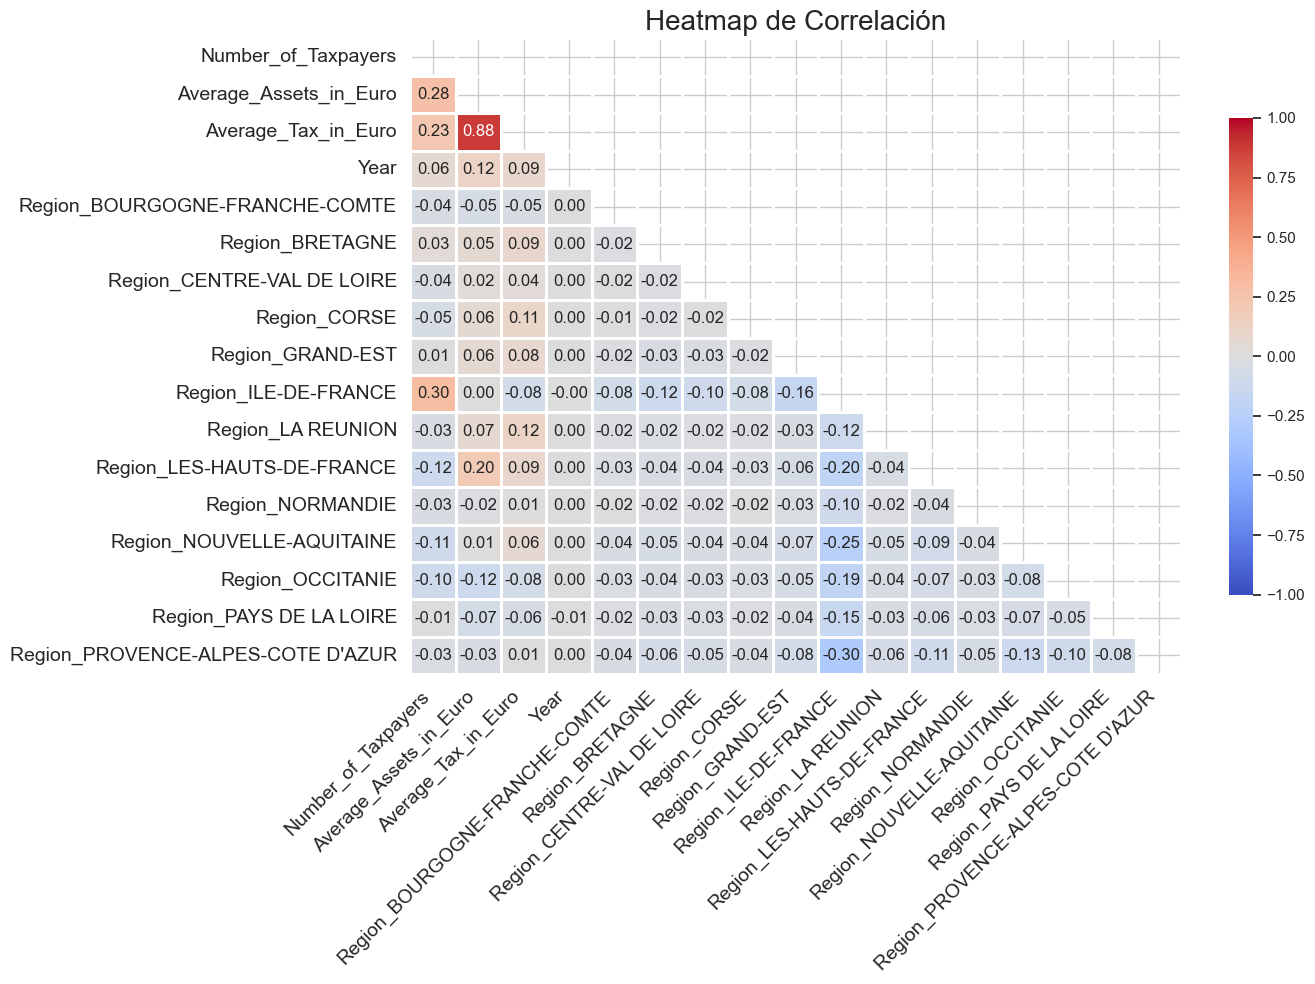

In [43]:
# Importando las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que ya tienes el DataFrame df_ificom y la lista cities_with_full_data definidos
df_corr = pd.get_dummies(df_ificom[['Number_of_Taxpayers','Average_Assets_in_Euro','Average_Tax_in_Euro',
                                    'Year','Region','City']]\
                        .query('City in @cities_with_full_data')\
                        .drop(columns=['City']),
                        columns=['Region'], drop_first=True).corr()

# Mejoras en la visualización del heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# Máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1, linecolor='white',
            cbar_kws={"shrink": 0.75}, fmt=".2f", mask=mask, annot_kws={"size": 12})

plt.title('Heatmap de Correlación', fontsize=20)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


Exploratory Data Analysis (EDA)
Descriptive Statistics: Obtain basic statistics (mean, median, standard deviation, etc.) for numerical columns like Number_of_Taxpayers, Average_Assets_in_Euro, Average_Tax_in_Euro.

Correlation: Investigate if there's any correlation between the numerical variables.

Visualization: Use charts to visualize the data.

Histograms for the distribution of assets and tax rates across different cities or departments.
Bar charts to compare the number of taxpayers across different regions or departments.
Heatmaps or geographical maps if you can acquire geospatial data for the communes.
Aggregate-Level Analysis
Grouping by Region/Department: It might be helpful to group the data by region or department to get aggregate metrics.

Time-Series Analysis: If you have access to data over multiple years, you could look at trends over time.

Inferential Analysis
Hypothesis Testing: If you have a specific hypothesis (e.g., "The Provence-Alpes-Cote d'Azur region has a significantly higher average asset value than the rest of France"), you could conduct a hypothesis test to confirm or refute this claim.

Predictive Modeling: If your aim is to make predictions, you could employ machine learning algorithms to model your data.

Other Potential Analyses
Pareto Analysis: You could apply the Pareto principle to see if a small number of communes or departments is contributing a significantly large amount of assets or taxes.

Outlier Analysis: You could identify and analyze outliers to understand anomalies in the data set.

Documentation and Communicating Results
Documentation: Make sure to document all the steps in your analysis and the conclusions you come to.

Presentation of Findings: Depending on your audience, you may need to prepare a report or presentation that outlines your findings in an easily understandable manner.

